# GETTING DATA READY

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [21]:
hd = pd.read_csv(r'D:\Complete Machine Learning\heart-disease.csv')

In [22]:
hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [23]:
hd.shape

(303, 14)

In [24]:
hd.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [25]:
X = hd.drop(columns = 'target', axis = 1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [26]:
y = hd['target']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [29]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [30]:
X.shape[0]*0.8 

242.4

# How to Handle Non -Numerical Data

In [31]:
cs = pd.read_csv(r'D:\Complete Machine Learning\car-sales-extended.csv')

In [32]:
cs.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [33]:
cs['Doors'].value_counts()

4    856
5     79
3     65
Name: Doors, dtype: int64

In [34]:
cs.nunique()

Make               4
Colour             5
Odometer (KM)    998
Doors              3
Price            984
dtype: int64

In [35]:
cs.columns

Index(['Make', 'Colour', 'Odometer (KM)', 'Doors', 'Price'], dtype='object')

In [36]:
cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Make           1000 non-null   object
 1   Colour         1000 non-null   object
 2   Odometer (KM)  1000 non-null   int64 
 3   Doors          1000 non-null   int64 
 4   Price          1000 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 39.2+ KB


In [37]:
x = cs.drop ('Price' , axis = 1)
x.head(3)

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4


In [38]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Make           1000 non-null   object
 1   Colour         1000 non-null   object
 2   Odometer (KM)  1000 non-null   int64 
 3   Doors          1000 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 31.4+ KB


In [39]:
y = cs['Price']

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
x_train , x_test , y_train , y_test = train_test_split(x , y ,test_size = 0.2)

## Build Machine Learning Model

In [42]:
from sklearn.ensemble import RandomForestRegressor

Model = RandomForestRegressor()
Model.fit(x_train, y_train)
Model.score(x_test , y_test)

ValueError: could not convert string to float: 'Toyota'

## Show error could not convert string to float

## Convert categorical data into numbers

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

Categorical_features = ['Make', 'Colour','Doors']
onehot = OneHotEncoder(sparse=False)
trans  = ColumnTransformer([('onehot', onehot, Categorical_features)] , remainder = 'passthrough')
transformed_x = trans.fit_transform(x)
transformed_x

In [ ]:
pd.DataFrame(data = transformed_x)

## Another way of conversion

In [ ]:
dummies  = pd.get_dummies(cs[['Make', 'Colour','Doors']])

In [ ]:
dummies

## now split and fit the model

In [ ]:
np.random.seed(42)
X_train , X_test , Y_train , Y_test = train_test_split(transformed_x , y ,test_size = 0.2)
from sklearn.ensemble import RandomForestRegressor
Model = RandomForestRegressor()
Model.fit(X_train,Y_train)

In [ ]:
Model.score(X_test ,Y_test)

# what if there are missing values

In [ ]:
c_s = pd.read_csv(r'D:\Complete Machine Learning\car-sales-extended-missing-data.csv')

In [ ]:
c_s.head()

In [ ]:
c_s.isnull().sum()

In [ ]:
c_s.info()

In [ ]:
c_s['Make'].value_counts()

In [ ]:
c_s['Doors'].value_counts()

In [ ]:
c_s['Doors'].mode()

In [ ]:
type(c_s['Make'].mode())

In [ ]:
type(c_s['Colour'].mode())

In [ ]:
type(c_s['Doors'].mode())

In [ ]:
type(c_s['Odometer (KM)'].mean())

In [ ]:
c_s['Colour'].mode()

In [ ]:
c_s['Make'].fillna('Toyoto', inplace = True)
c_s['Colour'].fillna('White', inplace = True)
c_s['Doors'].fillna(4.0, inplace = True)
c_s['Odometer (KM)'].fillna(c_s['Odometer (KM)'].mean(), inplace = True)

In [ ]:
c_s.info()

In [ ]:
c_s.isna().sum()

In [ ]:
c_s.dropna(inplace = True)

In [ ]:
c_s.isnull().sum()

In [ ]:
c_s.isna().sum()

In [ ]:
a = c_s.drop('Price',axis= 1)


In [ ]:
a.info()

In [ ]:
y = c_s['Price']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(a, y ,test_size = 0.2)

In [ ]:
X_train.shape ,X_test.shape

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make','Colour','Doors']
onehot = OneHotEncoder(sparse = False)
transformer = ColumnTransformer([('onehot',onehot,categorical_features)],remainder = 'passthrough')
transformed_a = transformer.fit_transform(a)
transformed_a

In [ ]:
pd.DataFrame(transformed_a)

In [ ]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_a, y ,test_size = 0.2)
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train,y_train)

In [ ]:
model.score(X_test,y_test)

# Fill missing values by scikit learn 

In [ ]:
cars = pd.read_csv(r'D:\Complete Machine Learning\car-sales-extended-missing-data.csv')

In [ ]:
cars.info()

In [ ]:
cars.dropna(subset=['Price'], inplace=True)
cars.info()

In [ ]:
cars.isna().sum()

In [ ]:
np.random.seed(42)
x = cars.drop('Price' ,axis = 1)
y = cars['Price']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x , y , test_size = 0.2)

In [ ]:
x.isna().sum()

In [ ]:
X_train.isna().sum() , X_test.isna().sum()

## Fill missing value using scikit learn

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

cat_impu = SimpleImputer(strategy='constant' , fill_value= 'Missing')
door_impu = SimpleImputer(strategy='constant' , fill_value= 4)
odo_impu = SimpleImputer(strategy='mean')

cat_fea = ['Make' , 'Colour']
door_fea = ['Doors']
odo_fea = ['Odometer (KM)']


ctf = ColumnTransformer([('cat_impu', cat_impu , cat_fea ),
                           ('door_impu', door_impu , door_fea),
                           ('odo_impu', odo_impu , odo_fea )])

filled_X_train = ctf.fit_transform(X_train)
filled_X_test  = ctf.transform(X_test)
filled_X_train

In [ ]:
csales_filled_train = pd.DataFrame(filled_X_train , columns = ['Make' ,'Colour','Doors','Odometer (KM)'])
csales_filled_test =  pd.DataFrame(filled_X_test , columns = ['Make' ,'Colour','Doors','Odometer (KM)'])

In [ ]:
csales_filled_train.isna().sum()

In [ ]:
csales_filled_train.info()

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose       import ColumnTransformer

cat_features = ['Make', 'Colour', 'Doors']
 
onehot =    OneHotEncoder(sparse = False)
coltrans =  ColumnTransformer([('onehot', onehot ,cat_features)], remainder = 'passthrough')

transformed_x_train = coltrans.fit_transform(csales_filled_train)
transformed_x_test  = coltrans.transform(csales_filled_test)

In [ ]:
transformed_x_train

In [ ]:
type(transformed_x_train)

In [ ]:
# fit the model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

model.fit(transformed_x_train ,y_train)
model.score(transformed_x_test,y_test)

# Choosing  the right estimator/algorithm for our problem

### Scikit-Learn uses estimator as another term for machine learning model or algorithm.

### Classification - predicting whether a sample is one thing or another
### Regression - predicting a number

## picking a machine learning model for a regression problem

In [8]:
from sklearn.datasets import load_boston
boston = load_boston()
boston;

In [9]:
boston_df = pd.DataFrame(boston['data'] , columns = boston['feature_names'])
boston_df['target'] = pd.Series(boston['target'])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [10]:
boston_df.shape

(506, 14)

In [11]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [ ]:
x = boston_df.drop(columns ='target')
y = boston_df['target']

np.random.seed(42)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)


In [ ]:
# fit Ridge model
from sklearn.linear_model import Ridge
model = Ridge()
model.fit(X_train,y_train)
model.score(X_test,y_test)

In [ ]:
# fit RandomForest model
from sklearn.ensemble import RandomForestRegressor
mod = RandomForestRegressor()
mod.fit(X_train,y_train)
mod.score(X_test,y_test)

## Choosing a estimator for a classification problem

In [67]:
h_d = pd.read_csv(r'D:\Complete Machine Learning\heart-disease.csv')

In [5]:
h_d.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [86]:
h_d.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [87]:
x = h_d.drop(columns = ['target'])
y = h_d['target']

In [88]:
np.random.seed(42)
from sklearn.model_selection import train_test_split
X_train,X_test , y_train,y_test = train_test_split(x,y,test_size = 0.2)

from sklearn.svm import LinearSVC
model1 = LinearSVC()
model1.fit(X_train,y_train)
model1.score(X_test,y_test)

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.8688524590163934

In [89]:
# fit another machine learning model
np.random.seed(42)
from sklearn.model_selection import train_test_split
X_train,X_test , y_train,y_test = train_test_split(x,y,test_size = 0.2)


from sklearn.ensemble import RandomForestClassifier
mo = RandomForestClassifier()
mo.fit(X_train,y_train)
mo.score(X_test, y_test)

0.8524590163934426

 ## Fit the model/algorithm on our data and use it to make predictions
 Fitting the model to the data
 Different names for:

* X = features, features variables, data
* y = labels, targets, target variables

In [90]:
np.random.seed(42)
from sklearn.model_selection import train_test_split
X_train,X_test , y_train,y_test = train_test_split(x,y,test_size = 0.2)


from sklearn.ensemble import RandomForestClassifier
mo = RandomForestClassifier()
mo.fit(X_train,y_train)
mo.score(X_test, y_test)

0.8524590163934426

In [91]:
mo.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [94]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [96]:
y_predi = mo.predict(X_test)
np.mean(y_predi == y_test)

0.8524590163934426

In [97]:
mo.score(X_test, y_test)

0.8524590163934426

In [100]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test , y_predi)

0.8524590163934426

### Make predictions with predict_proba() - use this if someone asks you "what's the probability your model is assigning to each prediction?"

In [102]:
mo.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [103]:
mo.predict(X_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

#### predict() can also be used for regression models.

In [7]:
boston_df.head()

NameError: name 'boston_df' is not defined

In [108]:
np.random.seed(42)
x = boston_df.drop(columns = 'target')
y = boston_df['target']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

from sklearn.ensemble import RandomForestRegressor
m = RandomForestRegressor()
m.fit(X_train,y_train)
m.score(X_test,y_test)

0.8654448653350507

In [115]:
 m.predict(X_test[:10])

array([23.081, 30.574, 16.759, 23.46 , 16.893, 21.644, 19.113, 15.334,
       21.14 , 20.639])

In [121]:
y_pre =  m.predict(X_test)

In [118]:
np.array(y_test[:10])

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8])

In [122]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pre)

2.136382352941176

## 4. Evaluating a machine learning model
* Three ways to evaluate Scikit-Learn models/esitmators:

* Estimator score method
* The scoring parameter
* Problem-specific metric functions.


### 4.1 Evaluating a model with the score method

In [6]:
np.random.seed(42)
x = h_d.drop(columns = 'target')
y = h_d['target']

from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)


0.8524590163934426

In [12]:
np.random.seed(42)
x = boston_df.drop(columns = 'target')
y = boston_df['target']

from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)


0.8654448653350507

### 4.2 Evaluating a model using the scoring parameter

In [15]:
np.random.seed(42)
x = h_d.drop(columns = 'target')
y = h_d['target']

from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier()
clf.fit(X_train,y_train)
cross_val_score(clf ,x ,y ,cv=5,scoring = None)


array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [18]:
clf.score(X_test,y_test),np.mean(cross_val_score(clf,x,y,cv=5,scoring=None))

(0.8524590163934426, 0.8281420765027322)

#### 4.2.1  Classification model evaluation metrics
* Accuracy
* Area under ROC curve
* Confusion matrix
* Classification report

##### Accuracy

In [23]:
np.random.seed(42)
x = h_d.drop(columns = 'target')
y = h_d['target']

from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier()
clf.fit(X_train,y_train)
cross_val_score = cross_val_score(clf ,x ,y ,cv=5,scoring = None)

In [24]:
np.mean(cross_val_score)

0.811639344262295

In [30]:
print(f'Heart disease Classifier cross_validated accuracy:{np.mean(cross_val_score)*100:.2f}%' )

Heart disease Classifier cross_validated accuracy:81.16%


#### Area under the receiver operating characteristic curve (AUC/ROC)

* Area under curve (AUC)
* ROC curve
* ROC curves are a comparison of a model's true postive rate (tpr) versus a models false positive rate (fpr).

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1


In [68]:
np.random.seed(42)
x = h_d.drop(columns = 'target')
y = h_d['target']

from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train,y_train)
y_pred_proba = clf.predict_proba(X_test)

In [69]:
y_pred_proba[:5]

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [70]:
y_positive_probas = y_pred_proba[:,1]
y_positive_probas[:10]

array([0.11, 0.51, 0.57, 0.16, 0.82, 0.86, 0.64, 0.05, 0.01, 0.53])

In [71]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test,y_positive_probas)

In [72]:
fpr ,tpr , thresholds

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.06896552,
        0.06896552, 0.10344828, 0.13793103, 0.13793103, 0.17241379,
        0.17241379, 0.27586207, 0.4137931 , 0.48275862, 0.55172414,
        0.65517241, 0.72413793, 0.72413793, 0.82758621, 1.        ]),
 array([0.     , 0.03125, 0.09375, 0.375  , 0.4375 , 0.4375 , 0.46875,
        0.59375, 0.6875 , 0.6875 , 0.71875, 0.75   , 0.75   , 0.875  ,
        0.875  , 0.96875, 0.96875, 0.96875, 0.96875, 0.96875, 0.96875,
        0.96875, 1.     , 1.     , 1.     ]),
 array([2.  , 1.  , 0.99, 0.83, 0.82, 0.8 , 0.78, 0.74, 0.67, 0.66, 0.64,
        0.62, 0.61, 0.53, 0.51, 0.3 , 0.2 , 0.16, 0.14, 0.13, 0.11, 0.07,
        0.06, 0.05, 0.  ]))

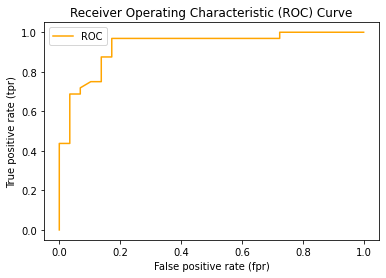

In [73]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model.
    """
    # Plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    # Plot line with no predictive power (baseline)
    #plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--", label="Guessing")
    
    # Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

In [74]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_positive_probas)

0.9304956896551724

### Confusion Matrix

* A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.

* In essence, giving you an idea of where the model is getting confused.

In [16]:
h_d = pd.read_csv(r'D:\Complete Machine Learning\heart-disease.csv')
x = h_d.drop(columns = 'target')
y = h_d['target']

np.random.seed(42)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
y_pred

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)


array([[24,  5],
       [ 4, 28]], dtype=int64)

<AxesSubplot:>

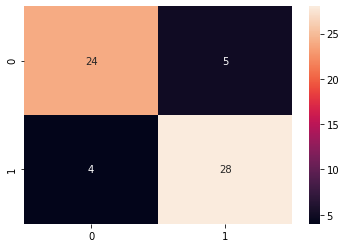

In [19]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot = True)

### Classification Report

In [32]:
h_d = pd.read_csv(r'D:\Complete Machine Learning\heart-disease.csv')
x = h_d.drop(columns = 'target')
y = h_d['target']

np.random.seed(42)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



### To summarize classification metrics:

* Accuracy is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1).
* Precision and recall become more important when classes are imbalanced.*
* If false positive predictions are worse than false negatives, aim for higher precision.
* If false negative predictions are worse than false positives, aim for higher recall.
* F1-score is a combination of precision and recall.

### 4.2.2 Regression model evaluation metrics
* R^2 (pronounced r-squared) or coefficient of determination.
* Mean absolute error (MAE)
* Mean squared error (MSE)

#### R^2

* What R-squared does: Compares your models predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, it's R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1.

#### Mean absolue error (MAE)

* MAE is the average of the aboslute differences between predictions and actual values. It gives you an idea of how wrong your models predictions are.

In [39]:
from sklearn.datasets import load_boston
boston = load_boston()
boston

boston_df = pd.DataFrame(boston['data'] , columns = boston['feature_names'])
boston_df['target'] = pd.Series(boston['target'])
boston_df.head()         

x = boston_df.drop(columns = 'target')
y = boston_df['target']

np.random.seed(42)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor()
clf.fit(X_train,y_train)
y_pre = clf.predict(X_test)
y_pre[:5]

array([23.081, 30.574, 16.759, 23.46 , 16.893])

In [40]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pre)

2.136382352941176

#### Mean squared error (MSE)

In [42]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pre)

9.867437068627442

### 4.2.3 Finally using the scoring parameter
* for classification model

In [10]:
h_d = pd.read_csv(r'D:\Complete Machine Learning\heart-disease.csv')
x = h_d.drop(columns = 'target')
y = h_d['target']

np.random.seed(42)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train,y_train)

np.random.seed(42)
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(clf,x,y,cv=5,scoring =None)
cvs

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [11]:
print(f'cross_validated_accuracy is :{np.mean(cvs)*100:.2f}%')

cross_validated_accuracy is :82.48%


In [15]:
np.random.seed(42)
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(clf,x,y,cv=5,scoring = 'accuracy')
cvs
print(f'cross_validated_accuracy is : {np.mean(cvs)*100:.2f}%')

cross_validated_accuracy is : 82.48%


In [17]:
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(clf,x,y,cv=5,scoring = 'precision')
cvs
print(f'cross_validated_precision is : {np.mean(cvs)*100:.2f}%')

cross_validated_precision is : 80.86%


In [18]:
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(clf,x,y,cv=5,scoring = 'recall')
cvs
print(f'cross_validated_recall is : {np.mean(cvs)*100:.2f}%')

cross_validated_recall is : 84.24%


In [19]:
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(clf,x,y,cv=5,scoring = 'f1')
cvs
print(f'cross_validated_f1 is : {np.mean(cvs)*100:.2f}%')

cross_validated_f1 is : 84.15%


* for regression model

In [33]:
from sklearn.datasets import load_boston
boston = load_boston()
boston

boston_df = pd.DataFrame(boston['data'],columns =boston['feature_names'])
boston_df['target'] = pd.Series(boston['target'])
boston_df

np.random.seed(42)
x = boston_df.drop(columns = 'target')
y = boston_df['target']

np.random.seed(42)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor()
clf.fit(X_train,y_train)

np.random.seed(42)
from sklearn.model_selection import cross_val_score
cv = cross_val_score(clf,x,y,cv=5,scoring =None)
cv
np.mean(cv)

0.6243870737930857

In [34]:
np.random.seed(42)
from sklearn.model_selection import cross_val_score
cv = cross_val_score(clf,x,y,cv=5,scoring ='r2')
cv
np.mean(cv)


0.6243870737930857

In [36]:
np.random.seed(42)
from sklearn.model_selection import cross_val_score
cv = cross_val_score(clf,x,y,cv=5,scoring ='neg_mean_absolute_error')
cv
np.mean(cv)

-3.0312352552902335

In [37]:
np.random.seed(42)
from sklearn.model_selection import cross_val_score
cv = cross_val_score(clf,x,y,cv=5,scoring ='neg_mean_squared_error')
cv
np.mean(cv)

-21.261442856882137

### 4.3 Using different evalution metrics as Scikit-Learn functions
* Classification evaluation functions

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

np.random.seed(42)
h_d = pd.read_csv(r'D:\Complete Machine Learning\heart-disease.csv')
x = h_d.drop(columns = 'target')
y = h_d['target']


X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

y_pre = clf.predict(X_test)

# Evaluate the Classifier
print('Classifier metrics on test set')
print(f'Accuracy:{accuracy_score(y_test,y_pre)*100:.2f}%')
print(f'Precision:{precision_score(y_test,y_pre)*100:.2f}%')
print(f'Recall:{recall_score(y_test,y_pre)*100:.2f}%')
print(f'f1:{f1_score(y_test,y_pre)*100:.2f}%')

Classifier metrics on test set
Accuracy:85.25%
Precision:84.85%
Recall:87.50%
f1:86.15%


* Regression evaluation functions

In [43]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = boston_df.drop("target", axis=1)
y = boston_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

# Make predictions using our regression model
y_preds = model.predict(X_test)

# Evaluate the regression model
print("Regression model metrics on the test set")
print(f"R^2: {r2_score(y_test, y_preds)}")
print(f"MAE: {mean_absolute_error(y_test, y_preds)}")
print(f"MSE: {mean_squared_error(y_test, y_preds)}")

Regression model metrics on the test set
R^2: 0.8654448653350507
MAE: 2.136382352941176
MSE: 9.867437068627442


### 5. Improving a model
* First predictions = baseline predictions. First model = baseline model.

* From a data perspective:

* Could we collect more data? (generally, the more data, the better)
* Could we improve our data?
* From a model perspective:

* Is there a better model we could use?
* Could we improve the current model?
* Hyperparameters vs. Parameters

* Parameters = model find these patterns in data
* Hyperparameters = settings on a model you can adjust to (potentially)      improve its ability to find patterns
* Three ways to adjust hyperparameters:

* By hand
* Randomly with RandomSearchCV
* Exhaustively with GridSearchCV

#### Improve Classification Model

In [45]:
from sklearn.ensemble import RandomForestClassifier

h_d = pd.read_csv(r'D:\Complete Machine Learning\heart-disease.csv')

np.random.seed(42)

h_d_shuffled = h_d.sample(frac = 1)

x = h_d_shuffled.drop(columns='target')
y = h_d_shuffled['target']

train_split = round( 0.7 * len(h_d_shuffled) )
val_split   = round( train_split + 0.15 * len(h_d_shuffled) )
X_train , y_train = x[:train_split] , y[:train_split]
X_valid , y_valid = x[train_split:val_split], y[train_split:val_split]
X_test  , y_test  = x[val_split:], y[val_split:]

len(X_train), len(X_valid), len(X_test)

clf = RandomForestClassifier()
clf.fit(X_train,y_train)

y_pred = clf.predict(X_valid)

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score 

print(f'accuracy is : {accuracy_score(y_valid,y_pred)*100:.2f}%')
print(f'precision is : {precision_score(y_valid,y_pred)*100:.2f}%')
print(f'recall is : {recall_score(y_valid,y_pred)*100:.2f}%')
print(f'f1_score is : {f1_score(y_valid,y_pred)*100:.2f}%')



accuracy is : 82.22%
precision is : 81.48%
recall is : 88.00%
f1_score is : 84.62%


In [13]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

#### 5.2 Hyperparameter tuning with RandomizedSearchCV

In [28]:
h_d = pd.read_csv(r'D:\Complete Machine Learning\heart-disease.csv')

np.random.seed(42)

h_d_shuffled = h_d.sample(frac = 1)

x = h_d_shuffled.drop(columns='target')
y = h_d_shuffled['target']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size= 0.2)

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()


# improve model by hyperparameter tuning with RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV

Grid = {'n_estimators': [10,100,200,500,1000,1200],
        'max_depth': [None,5,10,20,30],
        'max_features': ['auto','sqrt'],
        'min_samples_leaf': [1,2,4],
        'min_samples_split': [2,4,6] }

rs_clf = RandomizedSearchCV(estimator = clf,
                   param_distributions = Grid,
                   n_iter = 10,
                   cv = 5 ,
                   verbose = 2)


rs_clf.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   1.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   1.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   1.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   1.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   1.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=100; tot

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [29]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 20}

In [31]:
# evaluate the predictions
y_pr = rs_clf.predict(X_test)

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print(f'accuarcy is : {accuracy_score(y_test,y_pr)*100:.2f}%')
print(f'precision is : {precision_score(y_test,y_pr)*100:.2f}%')
print(f'recall is : {recall_score(y_test,y_pr)*100:.2f}%')
print(f'f1_score is : {f1_score(y_test,y_pr)*100:.2f}%')




accuarcy is : 83.61%
precision is : 87.10%
recall is : 81.82%
f1_score is : 84.38%


### 5.3 Hyperparameter tuning with GridSearchCV

In [38]:
h_d = pd.read_csv(r'D:\Complete Machine Learning\heart-disease.csv')

from sklearn.model_selection import GridSearchCV , train_test_split

np.random.seed(42)

h_d_shuffling = h_d.sample(frac = 1)

x = h_d_shuffling.drop(columns = 'target')
y = h_d_shuffling['target']

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

grid =  {'n_estimators': [100,200,500],
        'max_depth':     [10,20,30],
        'max_features':  ['auto','sqrt'],
        'min_samples_leaf':  [4],
        'min_samples_split': [2] }

gs_clf = GridSearchCV(estimator = clf,
                      param_grid = grid,
                      cv = 5,
                      verbose = 2)

gs_clf.fit(X_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.9s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   1.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200

[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   1.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   3.6s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   2.9s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   3.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   3.4s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   3.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END max_depth=30, max_features=sqrt

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [4], 'min_samples_split': [2],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [39]:
gs_clf.best_params_

{'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 100}

In [41]:
y_pre = gs_clf.predict(X_test)


# Evaluate the predictions
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print(f'accuarcy is : {accuracy_score(y_test,y_pre)*100:.2f}%')
print(f'precision is : {precision_score(y_test,y_pre)*100:.2f}%')
print(f'recall is : {recall_score(y_test,y_pre)*100:.2f}%')
print(f'f1_score is : {f1_score(y_test,y_pre)*100:.2f}%')

accuarcy is : 81.97%
precision is : 86.67%
recall is : 78.79%
f1_score is : 82.54%


In [43]:
# we are using print function for evaluation metrices repeatedly 
# so we make a eval_prediction function

def evaluate_pred(y_true,y_pre):
    
    accuracy = accuracy_score(y_true,y_pre)
    precision = accuracy_score(y_true,y_pre)
    recall   =  precision_score(y_true,y_pre)
    f1_score  =  f1_score(y_true,y_pre)

    metrics_dict = {'accuracy' : round(accuracy , 2),
                    'precision' : round(precision , 2),
                    'recall'   : round(recall , 2),
                    'f1_score' : round(f1_score , 2)}
    
    print(f'accuracy is : {accuracy*100:.2f}%' )
    print(f'precision is : {precision*100:.2f}%' )
    print(f'recall is : {recall*100:.2f}% ')
    print(f'f1_score is : {f1_score*100:.2f}%' )
          
    return metrics_dict

